# About Dataset
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

## Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

## Questions answered through this EDA:

1. Which game genres have been the most frequently produced?
2. In which year were the most games released?
3. What are the top 5 years for game releases, categorized by genre?
4. Which year had the highest global game sales?
5. What is the most frequently released game genre in a single year?
6. Which game genre has had the highest sales in a single year?
7. What game genre has the highest global sales price?
8. Which platform has the highest global sales price?
9. Which individual game has achieved the highest global sales price?
10. How do game sales compare across different genres?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('videogamessales.csv')

In [4]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.shape

(16598, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
df.isnull().mean()*100

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [8]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


First let's get rid of the missing data. The columns Year and Publisher have null values.
Year is a numerical column and Publisher is a categorical column. For Year column I will use random sample imputation technique and for Publisher column I will fill the null values with mode imputation.

In [9]:
df['Year'][df['Year'].isnull()] = df['Year'].dropna().sample(df['Year'].isnull().sum()).values

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df["Publisher"].mode(0)

0    Electronic Arts
dtype: object

In [11]:
df["Publisher"]=df["Publisher"].fillna("Electronic Arts")

In [12]:
df.isnull().mean()*100

Rank            0.0
Name            0.0
Platform        0.0
Year            0.0
Genre           0.0
Publisher       0.0
NA_Sales        0.0
EU_Sales        0.0
JP_Sales        0.0
Other_Sales     0.0
Global_Sales    0.0
dtype: float64

In [13]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'DS'),
  Text(1, 0, 'PS2'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'X360'),
  Text(5, 0, 'PSP'),
  Text(6, 0, 'PS'),
  Text(7, 0, 'PC'),
  Text(8, 0, 'XB'),
  Text(9, 0, 'GBA'),
  Text(10, 0, 'GC'),
  Text(11, 0, '3DS'),
  Text(12, 0, 'PSV'),
  Text(13, 0, 'PS4'),
  Text(14, 0, 'N64'),
  Text(15, 0, 'SNES'),
  Text(16, 0, 'XOne'),
  Text(17, 0, 'SAT'),
  Text(18, 0, 'WiiU'),
  Text(19, 0, '2600'),
  Text(20, 0, 'NES'),
  Text(21, 0, 'GB'),
  Text(22, 0, 'DC'),
  Text(23, 0, 'GEN'),
  Text(24, 0, 'NG'),
  Text(25, 0, 'SCD'),
  Text(26, 0, 'WS'),
  Text(27, 0, '3DO'),
  Text(28, 0, 'TG16'),
  Text(29, 0, 'GG'),
  Text(30, 0, 'PCFX')])

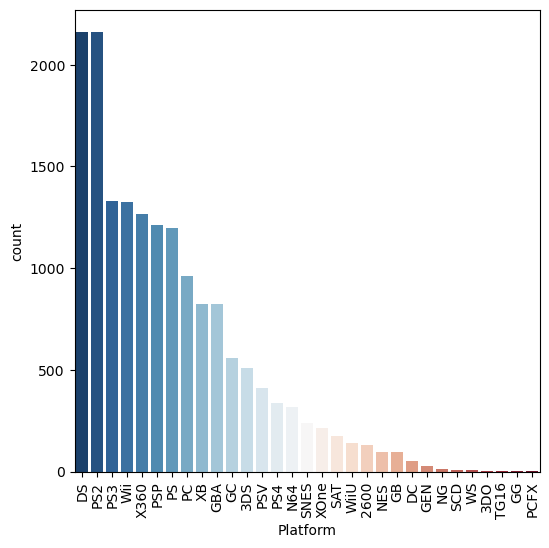

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.countplot(x='Platform',data=df,order = df['Platform'].value_counts().index,palette='RdBu_r', ax=ax)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

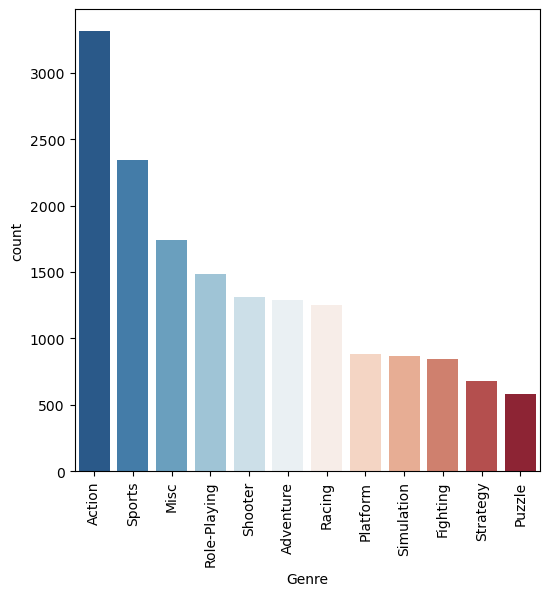

In [15]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.countplot(x='Genre',data=df,order = df['Genre'].value_counts().index,palette='RdBu_r', ax=ax)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0'),
  Text(5, 0, '2006.0'),
  Text(6, 0, '2005.0'),
  Text(7, 0, '2002.0'),
  Text(8, 0, '2003.0'),
  Text(9, 0, '2004.0'),
  Text(10, 0, '2012.0'),
  Text(11, 0, '2015.0'),
  Text(12, 0, '2014.0'),
  Text(13, 0, '2013.0'),
  Text(14, 0, '2001.0'),
  Text(15, 0, '1998.0'),
  Text(16, 0, '2000.0'),
  Text(17, 0, '2016.0'),
  Text(18, 0, '1999.0'),
  Text(19, 0, '1997.0'),
  Text(20, 0, '1996.0'),
  Text(21, 0, '1995.0'),
  Text(22, 0, '1994.0'),
  Text(23, 0, '1993.0'),
  Text(24, 0, '1981.0'),
  Text(25, 0, '1992.0'),
  Text(26, 0, '1991.0'),
  Text(27, 0, '1982.0'),
  Text(28, 0, '1986.0'),
  Text(29, 0, '1983.0'),
  Text(30, 0, '1989.0'),
  Text(31, 0, '1990.0'),
  Text(32, 0, '1987.0'),
  T

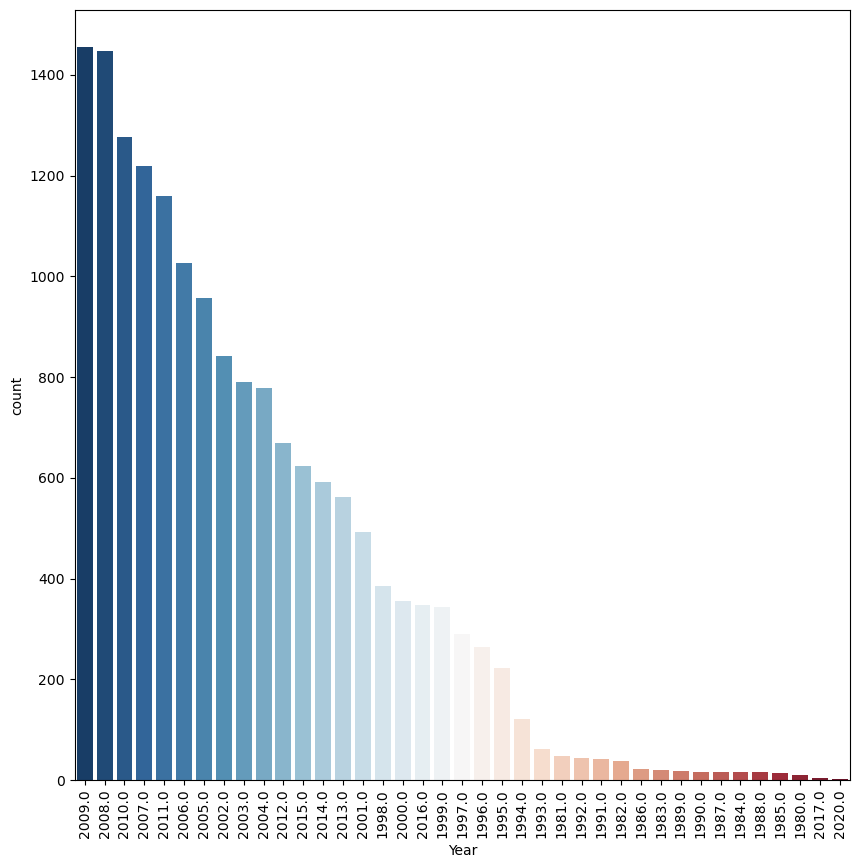

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x='Year',data=df,order = df['Year'].value_counts().index,palette='RdBu_r')
plt.xticks(rotation=90)

In [17]:
df.Year.value_counts().iloc[0:5]

2009.0    1456
2008.0    1448
2010.0    1277
2007.0    1220
2011.0    1160
Name: Year, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0')])

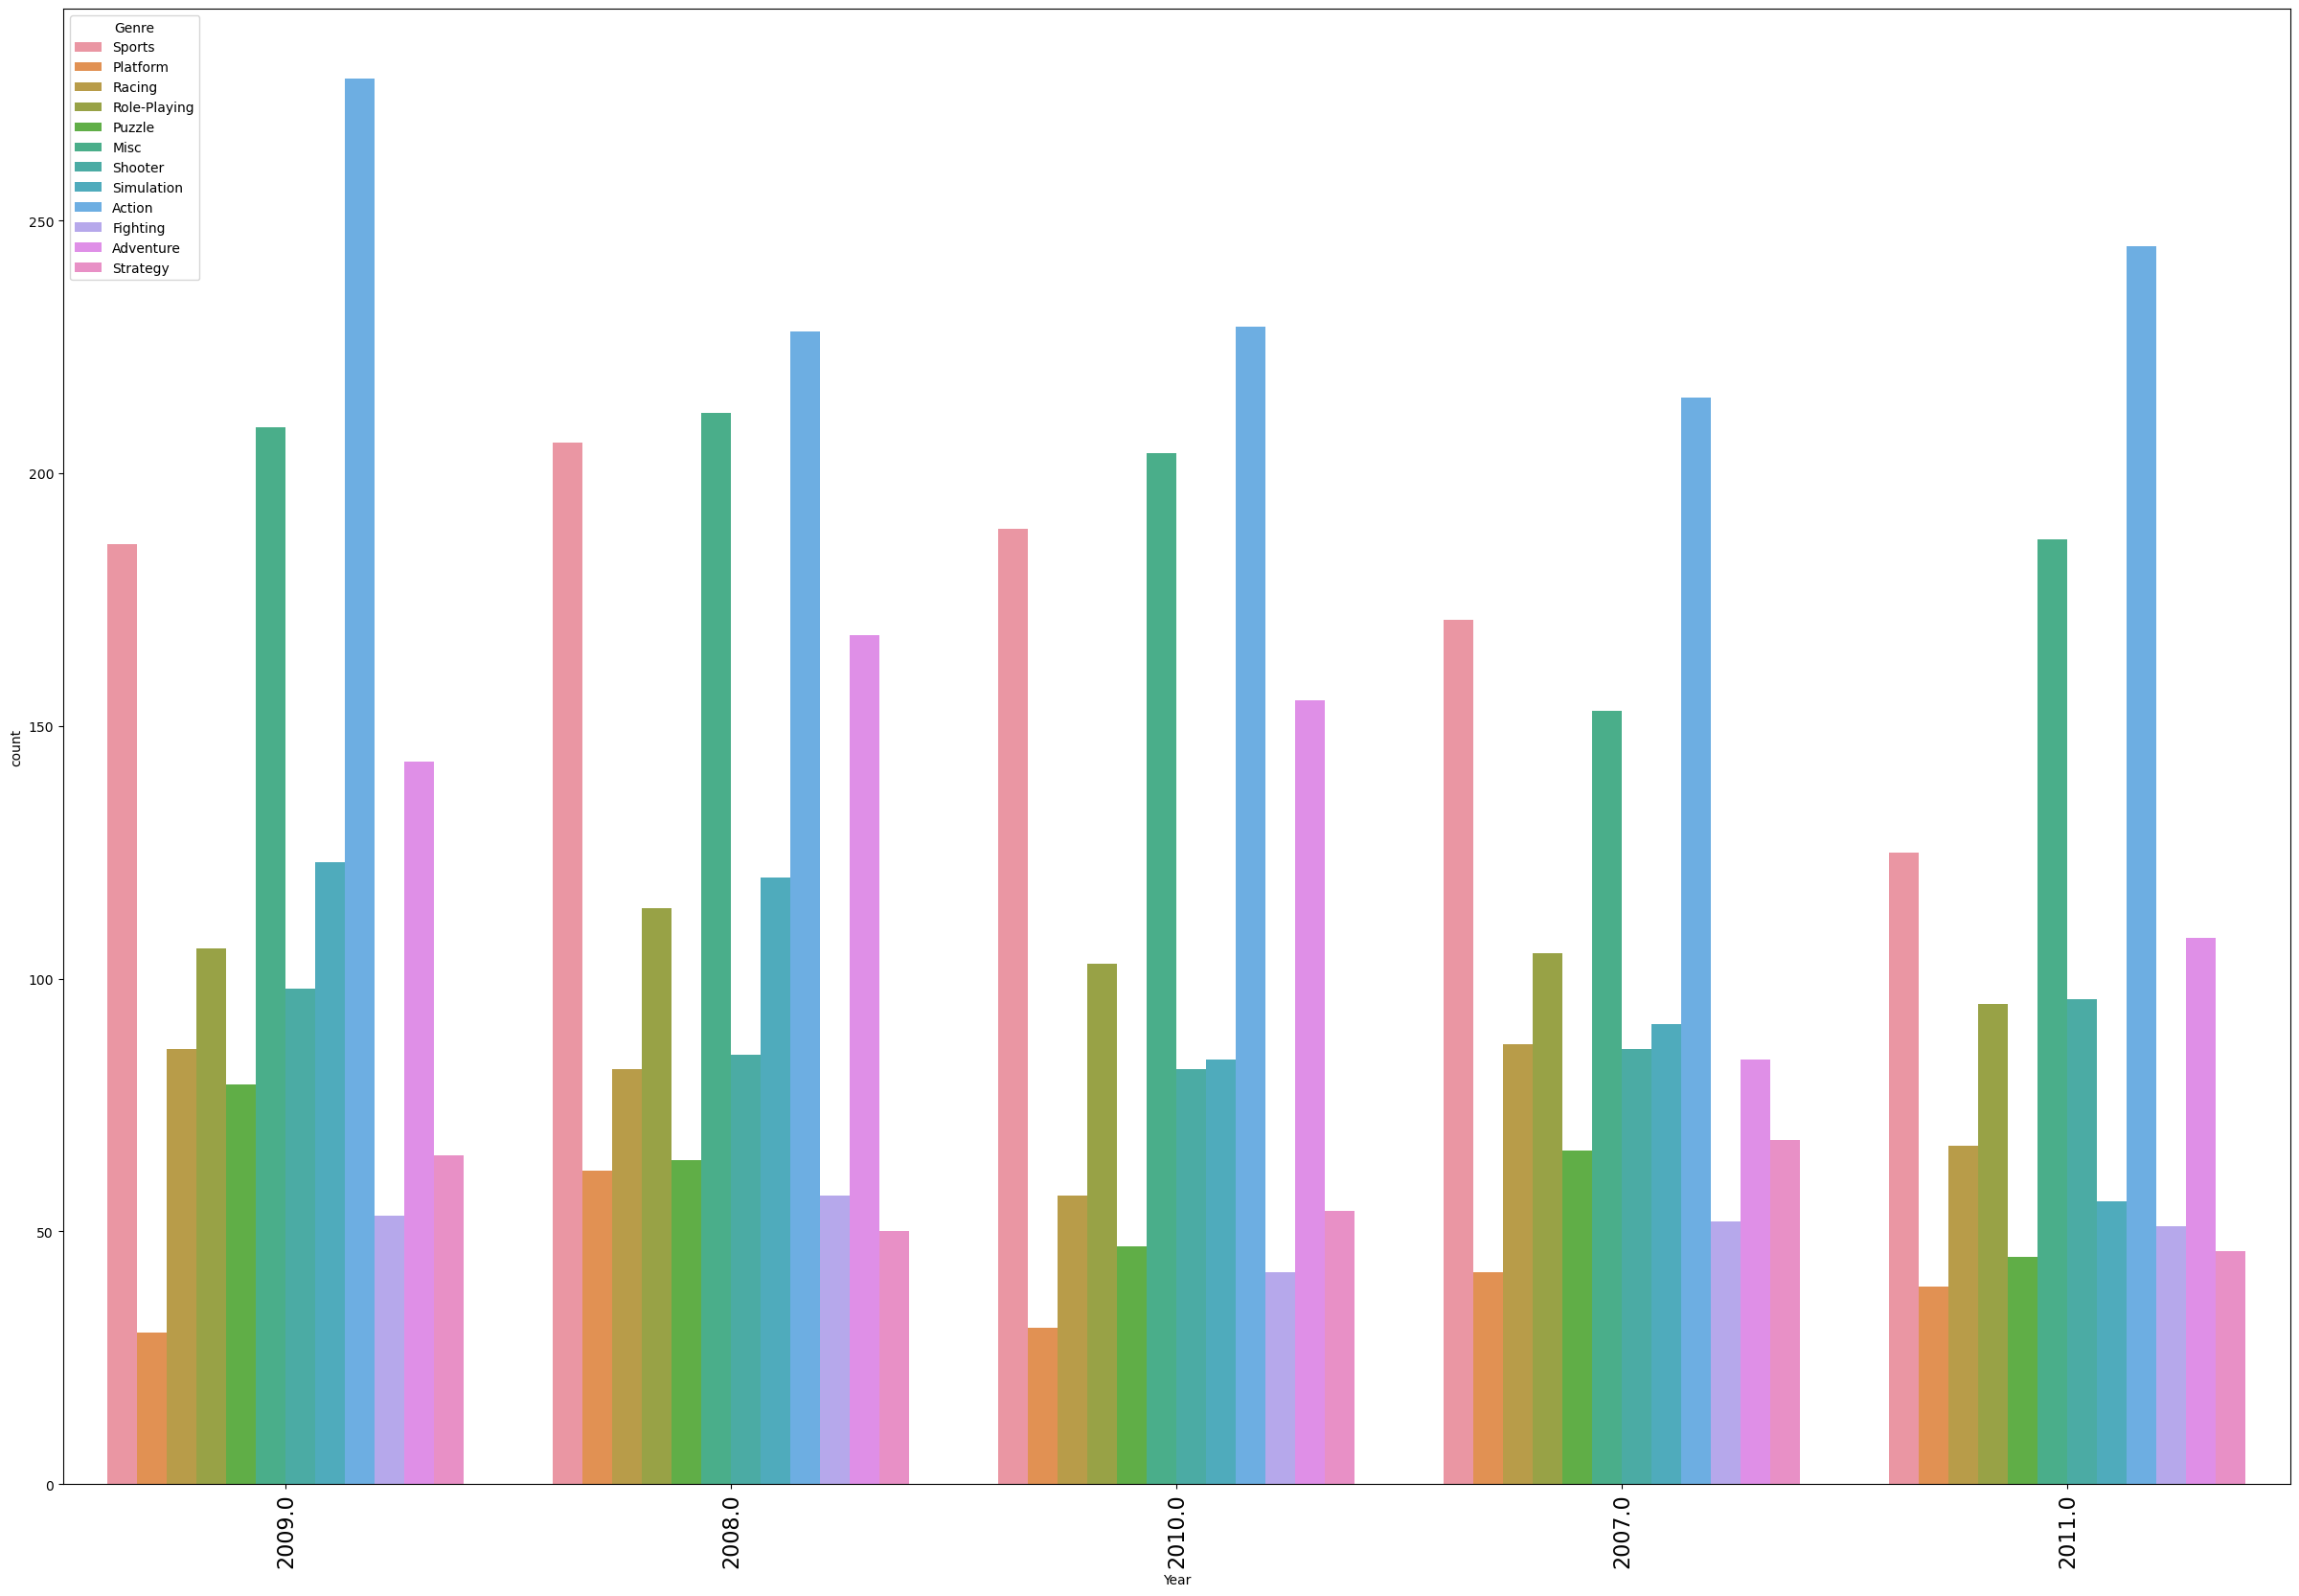

In [18]:
plt.figure(figsize=(30, 20))
sns.countplot(x="Year", data=df, hue='Genre', order=df.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

In [19]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [20]:
da_globalSale=df.groupby(by="Year")["Global_Sales"].sum()
da_globalSale=da_globalSale.reset_index()
da_globalSale=da_globalSale.sort_values(by=['Global_Sales'], ascending=False)[0:10]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2002.0'),
  Text(1, 0, '2004.0'),
  Text(2, 0, '2005.0'),
  Text(3, 0, '2006.0'),
  Text(4, 0, '2007.0'),
  Text(5, 0, '2008.0'),
  Text(6, 0, '2009.0'),
  Text(7, 0, '2010.0'),
  Text(8, 0, '2011.0'),
  Text(9, 0, '2013.0')])

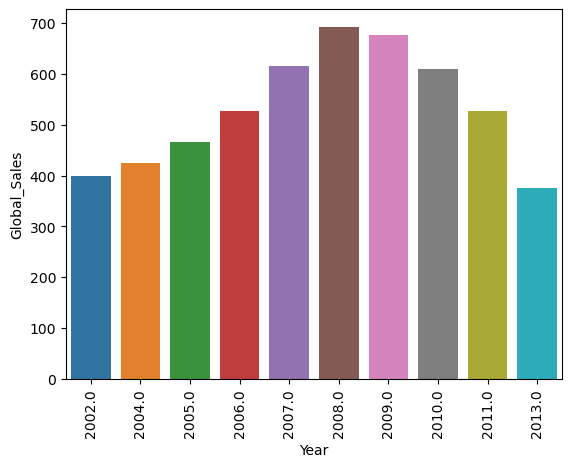

In [21]:
sns.barplot(x='Year',y='Global_Sales',data=da_globalSale[0:10])
plt.xticks(rotation=90)

In [22]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [23]:
year_max_df = df.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx]
year_max_genre

,Year,Genre,count
2,1980.0,Misc,4
5,1981.0,Action,25
12,1982.0,Action,19
19,1983.0,Action,7
29,1984.0,Puzzle,3
30,1984.0,Racing,3
32,1984.0,Shooter,3
36,1985.0,Platform,4
37,1985.0,Puzzle,4
41,1986.0,Action,6


In [24]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [25]:
year_max_df = df.groupby(by=['Year', 'Genre'])["Global_Sales"].sum().reset_index()
year_max_idx = year_max_df.groupby(['Year'])['Global_Sales'].transform(max) == year_max_df['Global_Sales']
year_max_genre = year_max_df[year_max_idx]
year_max_genre

,Year,Genre,Global_Sales
3,1980.0,Shooter,7.07
5,1981.0,Action,14.84
15,1982.0,Puzzle,10.03
22,1983.0,Platform,6.93
32,1984.0,Shooter,31.10
36,1985.0,Platform,43.17
41,1986.0,Action,13.74
50,1987.0,Fighting,5.42
56,1988.0,Platform,27.73
66,1989.0,Puzzle,37.75


In [26]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Platform'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Puzzle'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Strategy')])

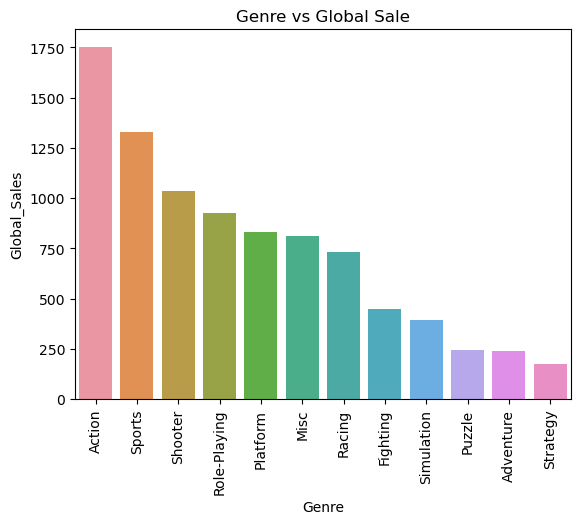

In [27]:
# Which genre game have the highest sale price globally
df_maxgen=df.groupby(by=["Genre"])["Global_Sales"].sum().reset_index()
df_maxgen=df_maxgen.sort_values(by=['Global_Sales'], ascending=False)
sns.barplot(x='Genre',y='Global_Sales',data=df_maxgen).set(title='Genre vs Global Sale')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'PS2'),
  Text(1, 0, 'X360'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'PS'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'PSP'),
  Text(8, 0, 'PS4'),
  Text(9, 0, 'PC'),
  Text(10, 0, 'XB'),
  Text(11, 0, 'GB'),
  Text(12, 0, 'NES'),
  Text(13, 0, '3DS'),
  Text(14, 0, 'N64'),
  Text(15, 0, 'SNES'),
  Text(16, 0, 'GC'),
  Text(17, 0, 'XOne'),
  Text(18, 0, '2600'),
  Text(19, 0, 'WiiU'),
  Text(20, 0, 'PSV'),
  Text(21, 0, 'SAT'),
  Text(22, 0, 'GEN'),
  Text(23, 0, 'DC'),
  Text(24, 0, 'SCD'),
  Text(25, 0, 'NG'),
  Text(26, 0, 'WS'),
  Text(27, 0, 'TG16'),
  Text(28, 0, '3DO'),
  Text(29, 0, 'GG'),
  Text(30, 0, 'PCFX')])

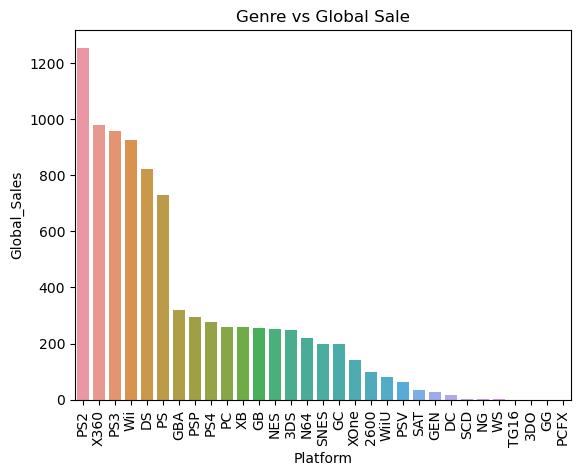

In [28]:
# Which platform game have the highest sale price globally
df_maxgen=df.groupby(by=["Platform"])["Global_Sales"].sum().reset_index()
df_maxgen=df_maxgen.sort_values(by=['Global_Sales'], ascending=False)
sns.barplot(x='Platform',y='Global_Sales',data=df_maxgen).set(title='Genre vs Global Sale')
plt.xticks(rotation=90)

In [29]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [30]:
NA_Sales_year=df.groupby(by=["Year"])["NA_Sales"].sum().reset_index()
EU_Sales_year=df.groupby(by=["Year"])["EU_Sales"].sum().reset_index()
JP_Sales_year=df.groupby(by=["Year"])["JP_Sales"].sum().reset_index()
JP_Sales_year

,Year,JP_Sales
0,1980.0,0.00
1,1981.0,0.00
2,1982.0,0.00
3,1983.0,8.10
4,1984.0,14.56
5,1985.0,14.56
6,1986.0,19.81
7,1987.0,11.63
8,1988.0,15.76
9,1989.0,18.36


In [31]:
df_cd = pd.merge(NA_Sales_year, EU_Sales_year, how='inner', on = 'Year')
df_sales=pd.merge(df_cd, JP_Sales_year, how='inner', on = 'Year')
df_sales

,Year,NA_Sales,EU_Sales,JP_Sales
0,1980.0,10.59,0.67,0.00
1,1981.0,34.21,2.51,0.00
2,1982.0,27.50,2.05,0.00
3,1983.0,8.05,0.91,8.10
4,1984.0,33.28,2.10,14.56
5,1985.0,33.73,4.74,14.56
6,1986.0,12.50,2.90,19.81
7,1987.0,8.46,1.41,11.63
8,1988.0,23.87,6.59,15.76
9,1989.0,45.15,8.44,18.36


<AxesSubplot:xlabel='Year'>

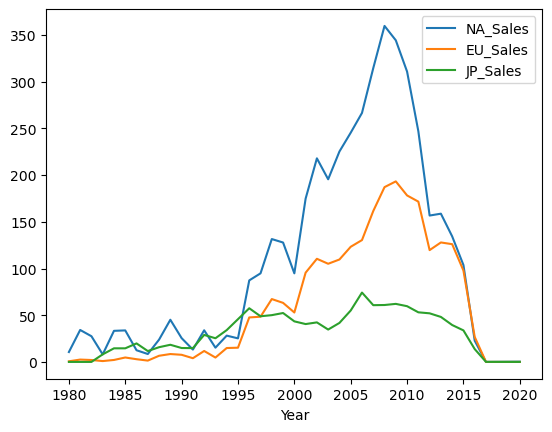

In [32]:
df_sales.plot(x="Year",y=["NA_Sales","EU_Sales","JP_Sales"])

In [33]:
df.head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [34]:
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [43]:
df['Genre'] = df['Genre'].replace(['Role-Playing'], 'Role_Playing')

In [44]:
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role_Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [45]:
Genre_sales_year=df.groupby(by=["Year","Genre"])["Global_Sales"].sum().reset_index()
Genre_sales_year[Genre_sales_year.Genre=="Action"]
for i in df.Genre.unique():
    globals()[f"df_{i}"]=Genre_sales_year[Genre_sales_year.Genre==i]


,Year,Genre,Global_Sales
31,1984.0,Role_Playing,0.33
45,1986.0,Role_Playing,2.52
52,1987.0,Role_Playing,4.65
59,1988.0,Role_Playing,5.88
67,1989.0,Role_Playing,2.20
74,1990.0,Role_Playing,4.52
84,1991.0,Role_Playing,3.25
96,1992.0,Role_Playing,6.86
108,1993.0,Role_Playing,5.59
120,1994.0,Role_Playing,7.18


In [56]:
data_frames=[df_Sports,df_Platform, df_Racing, df_Role_Playing, df_Puzzle, df_Misc,df_Shooter, df_Simulation, df_Action, df_Fighting, df_Adventure,df_Strategy]
df_merged=pd.concat(data_frames, join='outer', axis=0)
df_merged

,Year,Genre,Global_Sales
4,1980.0,Sports,0.49
11,1981.0,Sports,2.25
18,1982.0,Sports,1.05
25,1983.0,Sports,3.20
33,1984.0,Sports,6.18
...,...,...,...
340,2012.0,Strategy,3.49
352,2013.0,Strategy,6.69
364,2014.0,Strategy,0.99
376,2015.0,Strategy,1.86


<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

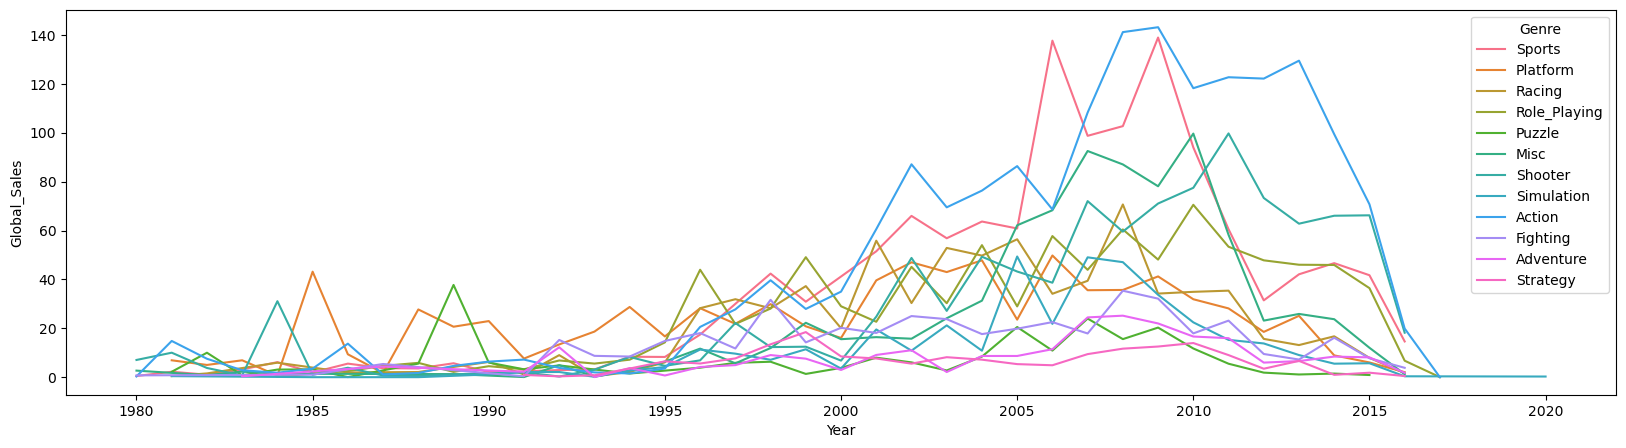

In [65]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_merged,x="Year",y="Global_Sales",hue="Genre")

In [66]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role_Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [73]:
df_publishers=df.groupby("Publisher")["Global_Sales"].sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)[0:10]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Activision'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Ubisoft'),
  Text(5, 0, 'Take-Two Interactive'),
  Text(6, 0, 'THQ'),
  Text(7, 0, 'Konami Digital Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Namco Bandai Games')])

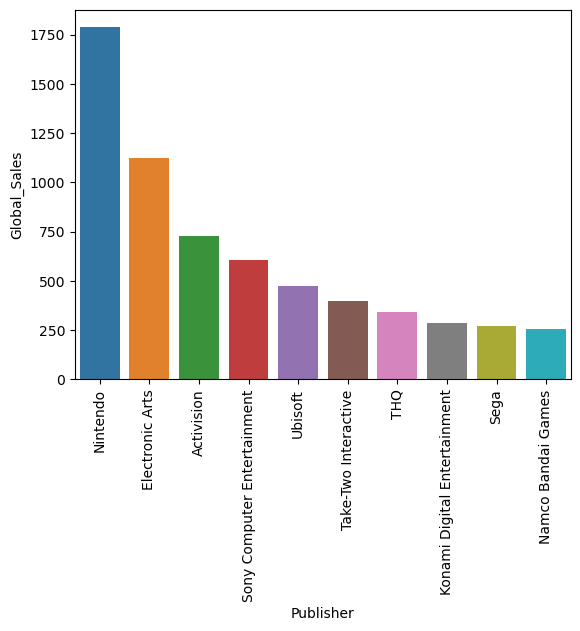

In [75]:
sns.barplot(x='Publisher',y='Global_Sales',data=df_publishers)
plt.xticks(rotation=90)

In [82]:
#sale performance by genre
df_genre=df[["Genre","Publisher","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]]
df_comparison=df_genre.groupby("Genre").sum()

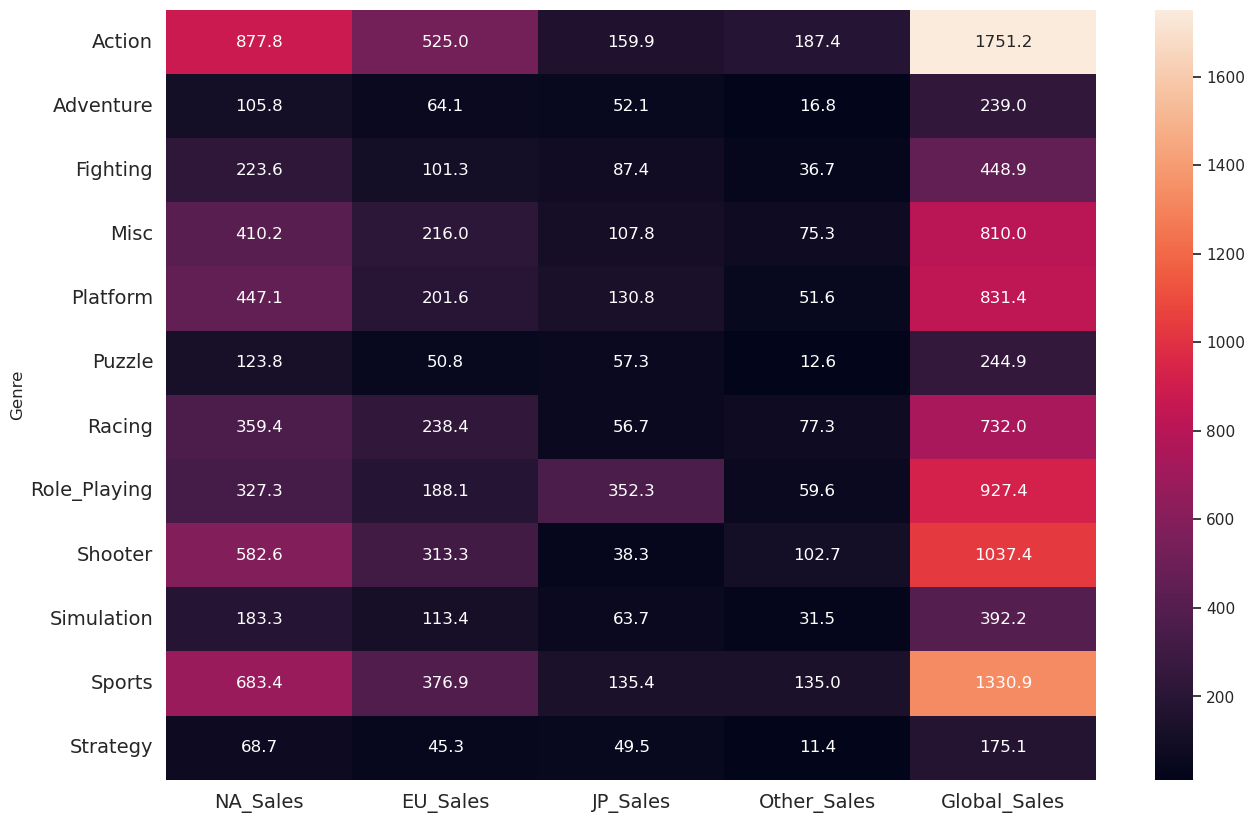

In [86]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_comparison, annot=True, fmt = '.1f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()